In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

torch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3849, done.
remote: Counting objects: 100% (3849/3849), done.
remote: Compressing objects: 100% (1571/1571), done.
remote: Total 3849 (delta 2255), reused 3753 (delta 2217), pack-reused 0
Receiving objects: 100% (3849/3849), 647.06 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (2255/2255), done.
Updating files: 100% (248/248), done.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [ ]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

In [ ]:
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Datasetransform

In [ ]:
from torchvision import transforms
from going_modular.going_modular import data_setup

IMG_SIZE = 224

manual_transform = transforms.Compose([

                                         transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                         transforms.ToTensor()])


dataloaders

In [ ]:
BATCH_SIZE = 32

train_dataloader,test_dataloader, class_name  = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = manual_transform,
    batch_size = BATCH_SIZE,
)

len(train_dataloader),len(test_dataloader), class_name

(8, 3, ['pizza', 'steak', 'sushi'])

PLot

In [ ]:
image_batch, label_batch  = next(iter(train_dataloader))


image = image_batch[0]
label = label_batch[0]

image.shape , label

(torch.Size([3, 224, 224]), tensor(0))

(-0.5, 223.5, 223.5, -0.5)

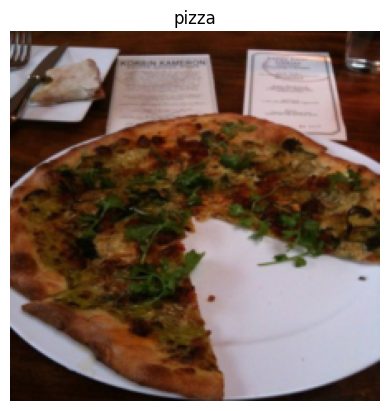

In [ ]:
import matplotlib.pyplot as plt
plt.title(class_name[label])
plt.imshow(image.permute(1,2,0))
plt.axis(False)

INPUT/OUTPUT DATA

In [ ]:
height = 224
width = 224
color_channels = 3
patch_size = 16

number_of_patches = int((height*width) / patch_size**2)
number_of_patches

196

In [ ]:
embedding_layer_input_shape = (height, width, color_channels)

embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

In [ ]:
from torch import nn

patch_size = 16

Conv2d = nn.Conv2d(in_channels=3,
                   out_channels = 768,
                   kernel_size = patch_size,
                   stride = patch_size,
                   padding = 0)
Conv2d

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [ ]:
image_out_conv2d = Conv2d(image.unsqueeze(0))
print(image_out_conv2d.shape)

torch.Size([1, 768, 14, 14])


In [ ]:
flatten_layer = nn.Flatten(start_dim = 2,end_dim = 3)
flatten_layer(image_out_conv2d).shape

torch.Size([1, 768, 196])

Patch_embedding_layer

In [ ]:
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate variables
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        # 6. Make sure the output shape has the right order
        return x_flattened.permute(0, 2, 1)

In [ ]:
set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image through
print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [ ]:
patch_embedded_image

tensor([[[-0.4540,  0.0046, -0.1580,  ...,  0.2369, -0.0273,  0.3145],
         [-0.1385, -0.0677, -0.2877,  ...,  0.1832,  0.0860,  0.2458],
         [-0.2635,  0.0679, -0.3791,  ...,  0.4114,  0.0459,  0.1031],
         ...,
         [-0.5227,  0.1839,  0.3010,  ...,  0.2607, -0.4772,  0.0552],
         [-0.0066, -0.1253, -0.0041,  ...,  0.2421, -0.3258,  0.0482],
         [-0.1226, -0.0038, -0.0430,  ...,  0.0706, -0.0444,  0.0555]]],
       grad_fn=<PermuteBackward0>)

EQUATION -1

In [ ]:
set_seeds()

patch_size = 16

print(f" image tensor shape:{image.shape}")

height, width = image.shape[1], image.shape[2]

x = image.unsqueeze(0)
print(f" input image shape: {x.shape}")

patch_embedding_layer = PatchEmbedding(in_channels = 3,
                                        patch_size = patch_size,
                                        embedding_dim = 768
                                         )

patch_embedding = patch_embedding_layer(x)

print(patch_embedding.shape)

batch_size = patch_embedding.shape[0]
embedding_dim = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1 , embedding_dim,
                                       requires_grad =True))
print(class_token.shape)

patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1 )

number_of_patches = int((width*height)/patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches + 1 , embedding_dim,
                                             requires_grad = True))

patch_and_position_embedding  = patch_embedding_class_token + position_embedding
print(patch_and_position_embedding.shape)

 image tensor shape:torch.Size([3, 224, 224])
 input image shape: torch.Size([1, 3, 224, 224])
torch.Size([1, 196, 768])
torch.Size([1, 1, 768])
torch.Size([1, 197, 768])


MSA-Block

In [ ]:
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ("MSA block" for short).
    """
    # 2. Initialize the class with hyperparameters from Table 1
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multi-Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True) # does our batch dimension come first?

    # 5. Create a forward() method to pass the data throguh the layers
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embeddings
                                             key=x, # key embeddings
                                             value=x, # value embeddings
                                             need_weights=False) # do we need the weights or just the layer outputs?
        return attn_output

In [ ]:
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, # from Table 1
                                                             num_heads=12)
patch_and_position_embedding_through_MSA = multihead_self_attention_block(patch_and_position_embedding)
print(patch_and_position_embedding_through_MSA.shape)

torch.Size([1, 197, 768])


In [ ]:
patch_and_position_embedding_through_MSA

tensor([[[-0.2176, -0.2133,  0.0645,  ..., -0.4005,  0.8589, -0.4612],
         [-0.2041, -0.1878,  0.0783,  ..., -0.3959,  0.8844, -0.4769],
         [-0.2126, -0.1889,  0.0773,  ..., -0.3880,  0.8752, -0.4845],
         ...,
         [-0.1928, -0.2133,  0.0532,  ..., -0.4075,  0.8783, -0.4830],
         [-0.2003, -0.2017,  0.0597,  ..., -0.4193,  0.8789, -0.4720],
         [-0.2088, -0.2168,  0.0622,  ..., -0.3930,  0.8798, -0.4804]]],
       grad_fn=<TransposeBackward0>)

MLP-BLOCK

In [ ]:
class MLPBlock(nn.Module):
  def __init__(self,
               embedding_dim:int=768,
               mlp_size:int=3072,
               dropout:float=0.1):
    super(). __init__()

    self.layer_norm = nn.LayerNorm(normalized_shape = embedding_dim)
    self.mlp = nn.Sequential(nn.Linear(in_features=embedding_dim,
                                       out_features= mlp_size),
                             nn.GELU(),
                             nn.Dropout(p=dropout),
                             nn.Linear(in_features=mlp_size,
                                       out_features=embedding_dim),
                             nn.Dropout(p=dropout)
    )
  def forward(self,x):
    x = self.layer_norm(x)
    x = self.mlp(x)

    return x



In [ ]:
mlp_block = MLPBlock(embedding_dim=768,
                     mlp_size=3072,
                     dropout=0.1)
patched_image_through_mlpblock = mlp_block(patch_and_position_embedding_through_MSA)
print(patched_image_through_mlpblock.shape)

torch.Size([1, 197, 768])


In [ ]:
patched_image_through_mlpblock

tensor([[[-0.0280, -0.0126,  0.1902,  ..., -0.0000, -0.1739,  0.2258],
         [-0.0762, -0.1314,  0.3111,  ..., -0.1280, -0.1447,  0.2120],
         [ 0.0158, -0.0605,  0.3237,  ..., -0.0000, -0.2099,  0.2178],
         ...,
         [-0.1518, -0.0382,  0.3086,  ...,  0.0768, -0.2260,  0.2989],
         [-0.0903,  0.0236,  0.0000,  ...,  0.0207, -0.1931,  0.0975],
         [-0.0506, -0.0345,  0.2877,  ..., -0.1394, -0.1645,  0.2054]]],
       grad_fn=<MulBackward0>)

TrnasformEncoderBlock

In [ ]:
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                 attn_dropout:float=0): # Amount of dropout for attention layers
        super().__init__()

        # 3. Create MSA block (equation 2)
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)

        # 4. Create MLP block (equation 3)
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)

    def forward(self,x):
      x = self.msa_block(x) + x
      x = self.mlp_block(x) + x

      return x



In [ ]:
transformer_encoder_block = TransformerEncoderBlock()

#summary(model=transformer_encoder_block,
#        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
#        col_names=["input_size", "output_size", "num_params", "trainable"],
#        col_width=20,
#        row_settings=["var_names"])

Putting it all together - Creating ViTransformer

In [ ]:
#1. Create a ViT class that inherits from nn.Module
class ViT(nn.Module):
    """Creates a Vision Transformer architecture with ViT-Base hyperparameters by default."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000): # Default for ImageNet but can customize this
        super().__init__() # don't forget the super().__init__()!

        # 3. Make the image size is divisble by the patch size
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

        # 4. Calculate number of patches (height * width/patch^2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 5. Create learnable class embedding (needs to go at front of sequence of patch embeddings)
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)

        # 6. Create learnable position embedding
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)

        # 7. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        # 8. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)

        # 9. Create Transformer Encoder blocks (we can stack Transformer Encoder blocks using nn.Sequential())
        # Note: The "*" means "all"
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])

        # 10. Create classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )

    # 11. Create a forward() method
    def forward(self, x):

        # 12. Get batch size
        batch_size = x.shape[0]

        # 13. Create class token embedding and expand it to match the batch size (equation 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # 14. Create patch embedding (equation 1)
        x = self.patch_embedding(x)

        # 15. Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # 16. Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # 17. Run embedding dropout (Appendix B.1)
        x = self.embedding_dropout(x)

        # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x

In [ ]:
vit = ViT()
vit

ViT(
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (patch_embedding): PatchEmbedding(
    (patcher): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (transformer_encoder): Sequential(
    (0): TransformerEncoderBlock(
      (msa_block): MultiheadSelfAttentionBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (multihead_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (mlp_block): MLPBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
  

LOSS FUNCTION AND OPTIMIZER

In [ ]:
optimizer = torch.optim.Adam(vit.parameters(),
                             lr=1e-3,
                             betas=(0.9, 0.999),
                             weight_decay=0.1)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
from going_modular.going_modular import engine
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.9323 | train_acc: 0.3594 | test_loss: 1.9524 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.5184 | train_acc: 0.3008 | test_loss: 1.1157 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.3608 | train_acc: 0.4258 | test_loss: 2.0593 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.9863 | train_acc: 0.2969 | test_loss: 1.4296 | test_acc: 0.5417
Epoch: 5 | train_loss: 1.7145 | train_acc: 0.2734 | test_loss: 1.4775 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.6733 | train_acc: 0.2734 | test_loss: 1.7496 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.4029 | train_acc: 0.4180 | test_loss: 1.1254 | test_acc: 0.5417
Epoch: 8 | train_loss: 1.2786 | train_acc: 0.2695 | test_loss: 1.0668 | test_acc: 0.5417
Epoch: 9 | train_loss: 1.2786 | train_acc: 0.2617 | test_loss: 1.4519 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.2817 | train_acc: 0.2812 | test_loss: 1.2558 | test_acc: 0.1979


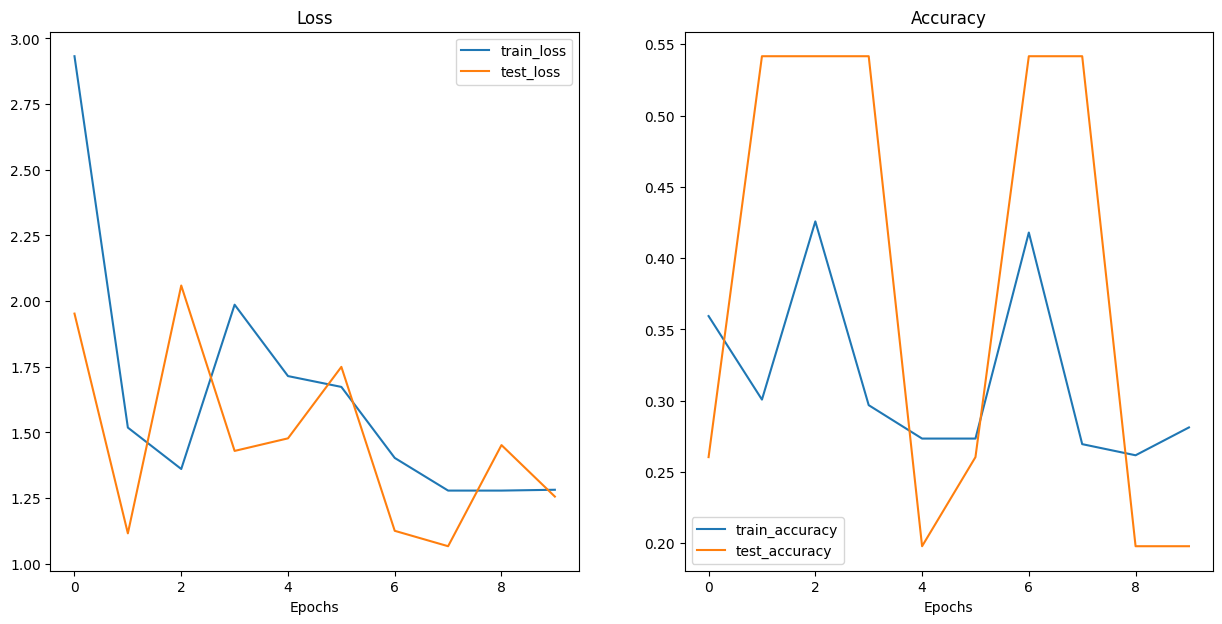

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(results)

PRETRAINED VIT

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [ ]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

In [ ]:
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 87.8MB/s]


In [ ]:
for parameter in pretrained_vit.parameters():
  parameter.requires_grad=False

#classifier head
pretrained_vit.heads = nn.Linear(in_features=embedding_dim, out_features=len(class_name)).to(device)

In [ ]:
# # Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

DATA for PreTrained VIT

In [ ]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32)

In [ ]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7559 | train_acc: 0.7031 | test_loss: 0.5398 | test_acc: 0.8475
Epoch: 2 | train_loss: 0.3397 | train_acc: 0.9375 | test_loss: 0.3389 | test_acc: 0.8778
Epoch: 3 | train_loss: 0.2050 | train_acc: 0.9609 | test_loss: 0.2815 | test_acc: 0.8977
Epoch: 4 | train_loss: 0.1539 | train_acc: 0.9648 | test_loss: 0.2542 | test_acc: 0.8977
Epoch: 5 | train_loss: 0.1241 | train_acc: 0.9727 | test_loss: 0.2425 | test_acc: 0.8977
Epoch: 6 | train_loss: 0.1231 | train_acc: 0.9766 | test_loss: 0.2307 | test_acc: 0.8977
Epoch: 7 | train_loss: 0.0938 | train_acc: 0.9805 | test_loss: 0.2569 | test_acc: 0.9081
Epoch: 8 | train_loss: 0.0800 | train_acc: 0.9883 | test_loss: 0.2500 | test_acc: 0.9081
Epoch: 9 | train_loss: 0.0992 | train_acc: 0.9883 | test_loss: 0.2271 | test_acc: 0.9081
Epoch: 10 | train_loss: 0.0642 | train_acc: 0.9883 | test_loss: 0.1973 | test_acc: 0.9176


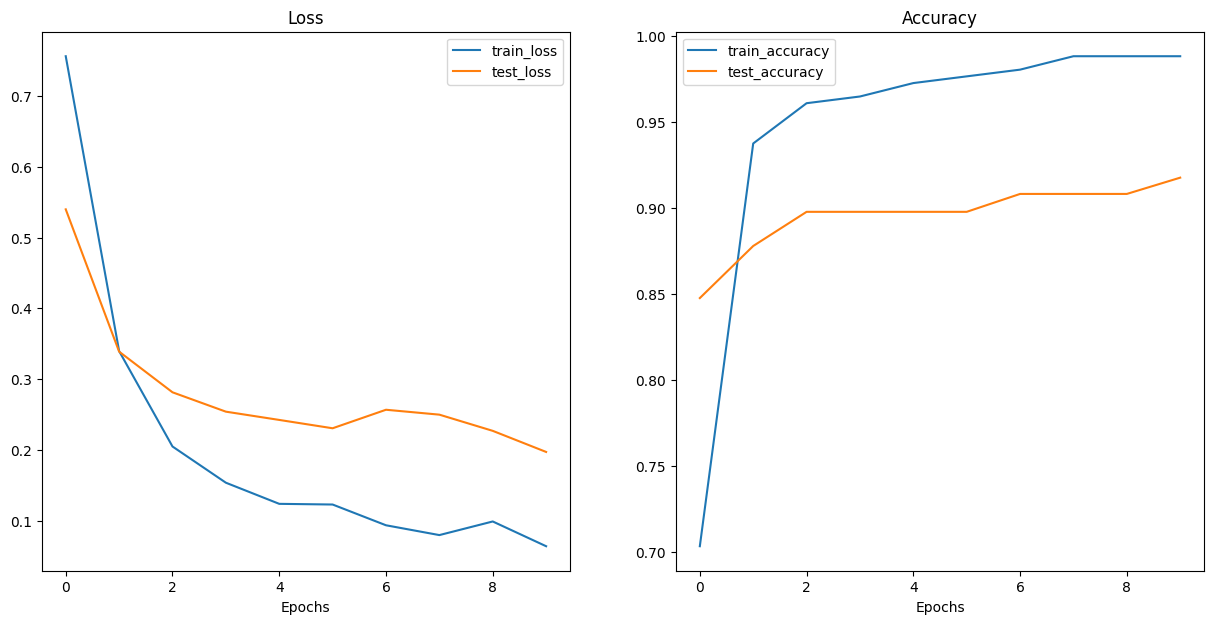

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

Prediction on Custom data

data/pizza_steak_sushi/04-pizza-dad.jpeg already exists, skipping download.


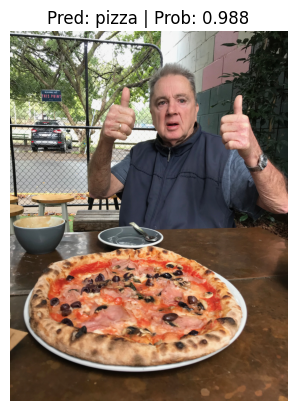

In [ ]:
import requests

# Import function to make predictions on images and plot them
from going_modular.going_modular.predictions import pred_and_plot_image

# Setup custom image path
#custom_image_path = image_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://media.timeout.com/images/105811687/750/562/image.jpg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)